In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
faces_data = fetch_olivetti_faces()
n_samples, height, width = faces_data.images.shape

In [8]:
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [16]:
n_components=150

In [17]:
from sklearn.decomposition import RandomizedPCA

In [19]:
pca=RandomizedPCA(n_components=n_components,whiten=True).fit(X_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))

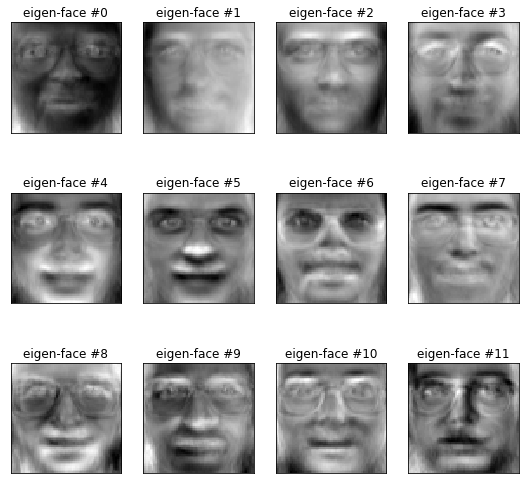

In [23]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [24]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train_pca, y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Detect faces in the test set
y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy: 0.55
             precision    recall  f1-score   support

          0       1.00      0.25      0.40         4
          1       0.00      0.00      0.00         2
          2       0.50      0.50      0.50         2
          3       1.00      0.50      0.67         4
          4       0.50      1.00      0.67         3
          5       0.50      1.00      0.67         3
          6       0.00      0.00      0.00         1
          7       1.00      0.29      0.44         7
          8       0.40      1.00      0.57         2
          9       1.00      1.00      1.00         3
         10       1.00      0.67      0.80         3
         11       1.00      0.25      0.40         4
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         1
         14       0.25      1.00      0.40         3
         15       1.00      0.50      0.67         2
         17       1.00      0.67      0.80         3
         18       0.50      1.

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


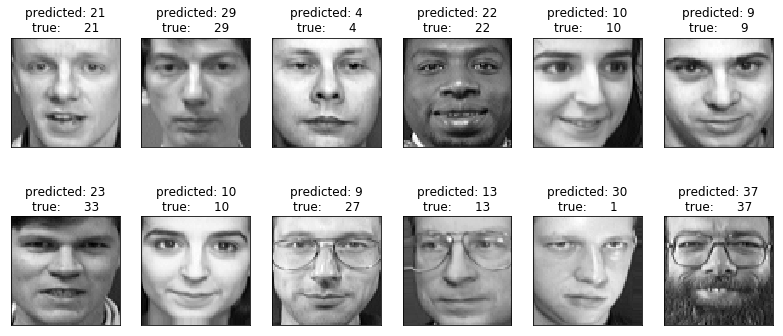

In [28]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test, y_test, target_names, i)
                     for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()